In [4]:
ls

drive/  sample_data/


In [5]:
import numpy as np
import pandas as pd
import os

base_dir = './drive/MyDrive/Colab Notebooks/Covid19-dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'Covid')
train_normal_dir = os.path.join(train_dir, 'Normal')

validation_covid_dir = os.path.join(validation_dir, 'Covid')
validation_normal_dir = os.path.join(validation_dir, 'Normal')

train_covid_fnames = os.listdir(train_covid_dir)
train_normal_fnames = os.listdir(train_normal_dir)

print(train_covid_fnames[:10])
print(train_normal_fnames[:10])


['COVID_1196.png', 'COVID_1344.png', 'COVID_1487.png', 'COVID_1253.png', 'COVID_1133.png', 'COVID_1245.png', 'COVID_1098.png', 'COVID_1185.png', 'COVID_1176.png', 'COVID_1108.png']
['NORMAL_1589.png', 'NORMAL_1545.png', 'NORMAL_1528.png', 'NORMAL_1697.png', 'NORMAL_1418.png', 'NORMAL_1602.png', 'NORMAL_1676.png', 'NORMAL_1702.png', 'NORMAL_1568.png', 'NORMAL_1382.png']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [7]:
import tensorflow as tf
 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 64)        3

In [10]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 4715 images belonging to 3 classes.
Found 993 images belonging to 3 classes.


In [12]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=12,
                              epochs=15,
                              validation_steps = 3,
                              verbose=2,
                              )

Epoch 1/15
12/12 - 88s - loss: 0.7202 - accuracy: 0.4042 - val_loss: 0.3107 - val_accuracy: 0.6333
Epoch 2/15
12/12 - 78s - loss: 0.0828 - accuracy: 0.5333 - val_loss: 0.3963 - val_accuracy: 0.5833
Epoch 3/15
12/12 - 70s - loss: -6.1791e-01 - accuracy: 0.6208 - val_loss: -3.9068e-01 - val_accuracy: 0.6167
Epoch 4/15
12/12 - 71s - loss: -8.2508e-01 - accuracy: 0.5208 - val_loss: -4.6515e-01 - val_accuracy: 0.6667
Epoch 5/15
12/12 - 66s - loss: -1.0624e+00 - accuracy: 0.5458 - val_loss: -6.9061e-02 - val_accuracy: 0.6500
Epoch 6/15
12/12 - 67s - loss: -1.5612e+00 - accuracy: 0.5792 - val_loss: -1.2304e+00 - val_accuracy: 0.7167
Epoch 7/15
12/12 - 58s - loss: -1.4744e+00 - accuracy: 0.5250 - val_loss: -1.0691e+00 - val_accuracy: 0.7167
Epoch 8/15
12/12 - 54s - loss: -1.8130e+00 - accuracy: 0.5583 - val_loss: -2.1408e+00 - val_accuracy: 0.5667
Epoch 9/15
12/12 - 53s - loss: -2.3598e+00 - accuracy: 0.5542 - val_loss: -2.0417e+00 - val_accuracy: 0.6833
Epoch 10/15
12/12 - 50s - loss: -2.9369

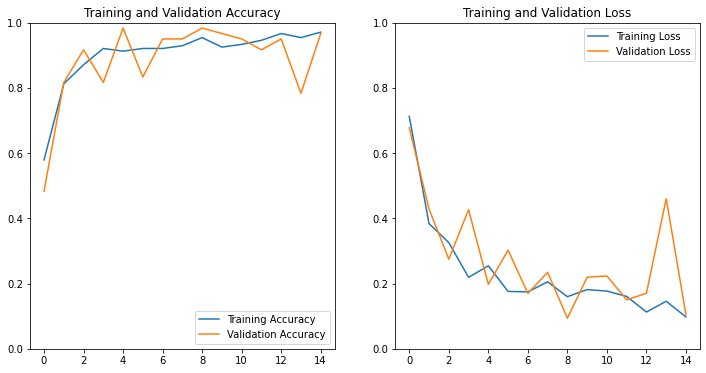

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim(0,1)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate_generator(validation_generator)

[0.11608461290597916, 0.9512194991111755]

In [ ]:
model.evaluate_generator(train_generator)

[0.07916747033596039, 0.9725000262260437]

In [ ]:
base_dir = './Covid19-dataset'
test_dir = os.path.join(base_dir, 'test')
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 40 images belonging to 2 classes.


In [ ]:
model.evaluate_generator(test_generator)

[0.08316661417484283, 0.9750000238418579]

In [ ]:
class_names = ['Covid Negative', 'Covid Positive']

In [ ]:
class_names[np.where(predictions>=0.5, 1, 0)[0][0]]

'Covid Positive'

[[1.]] <class 'numpy.ndarray'>
This image most likely belongs to Covid Positive


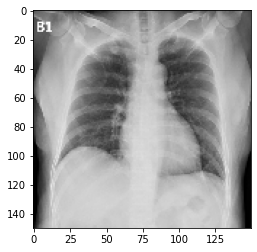

In [ ]:
import pathlib

test_dir = "./Covid19-dataset/test/Covid Positive/094.png"
test_dir = pathlib.Path(test_dir)

img = tf.keras.preprocessing.image.load_img(
    test_dir, target_size=(150, 150)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(predictions, type(predictions))

print(
    "This image most likely belongs to {}"
    .format(class_names[np.where(predictions>=0.5, 1, 0)[0][0]])
)

plt.imshow(img)
plt.show()


[[0.]]
This image most likely belongs to Covid Negative


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


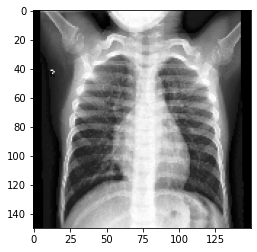

In [ ]:

test_dir = "./Covid19-dataset/test/Covid Negative/0121.jpeg"
test_dir = pathlib.Path(test_dir)

img = tf.keras.preprocessing.image.load_img(
    test_dir, target_size=(150, 150)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
predictions = model.predict_proba(img_array)
print(predictions)

print(
    "This image most likely belongs to {}"
    .format(class_names[np.where(predictions>=0.5, 1, 0)[0][0]])
)

plt.imshow(img)
plt.show()

['0100.jpeg', '0102.jpeg', '0105.png', '0106.jpeg', '0108.jpeg', '0111.jpg', '0112.jpg', '0113.jpg', '0115.jpeg', '0118.jpeg', '0119.jpeg', '0120.jpg']
['0101.jpeg', '0102.jpeg', '0103.jpeg', '0105.jpeg', '0106.jpeg', '0107.jpeg', '0108.jpeg', '0109.jpeg', '0110.jpeg', '0111.jpeg', '0112.jpeg', '0114.jpeg']


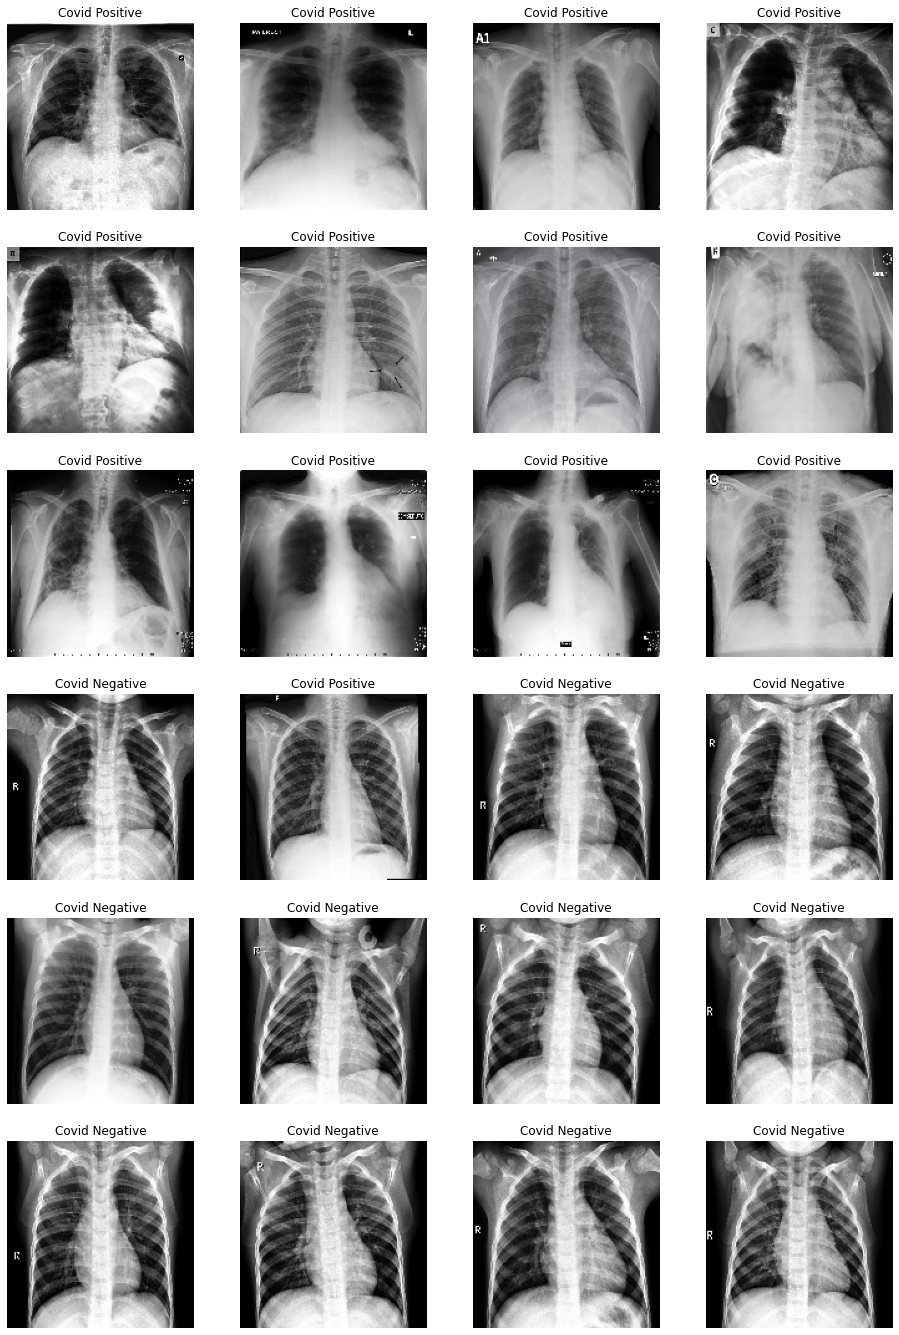

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration

nrows = 6
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=12

test_dir = './Covid19-dataset/test'

test_covid_dir = os.path.join(test_dir, 'Covid Positive')
test_ncovid_dir = os.path.join(test_dir, 'Covid Negative')

test_covid_fnames = os.listdir(test_covid_dir)
test_ncovid_fnames = os.listdir(test_ncovid_dir)

next_covid_pix = [os.path.join(test_covid_dir, fname) 
                for fname in test_covid_fnames [ pic_index-12:pic_index] 
               ]

next_ncovid_pix = [os.path.join(test_ncovid_dir, fname) 
                for fname in test_ncovid_fnames[ pic_index-12:pic_index]
               ]

print(test_covid_fnames[:12])
print(test_ncovid_fnames[:12])

for i, img_path in enumerate(next_covid_pix+next_ncovid_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = tf.keras.preprocessing.image.load_img(
      img_path, target_size=(150, 150)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    # predictions = model.predict(img_array)
    predictions = model.predict(img_array) 
    sp.set_title(class_names[np.where(predictions>=0.5, 1, 0)[0][0]])
  
    plt.imshow(img)

plt.show()

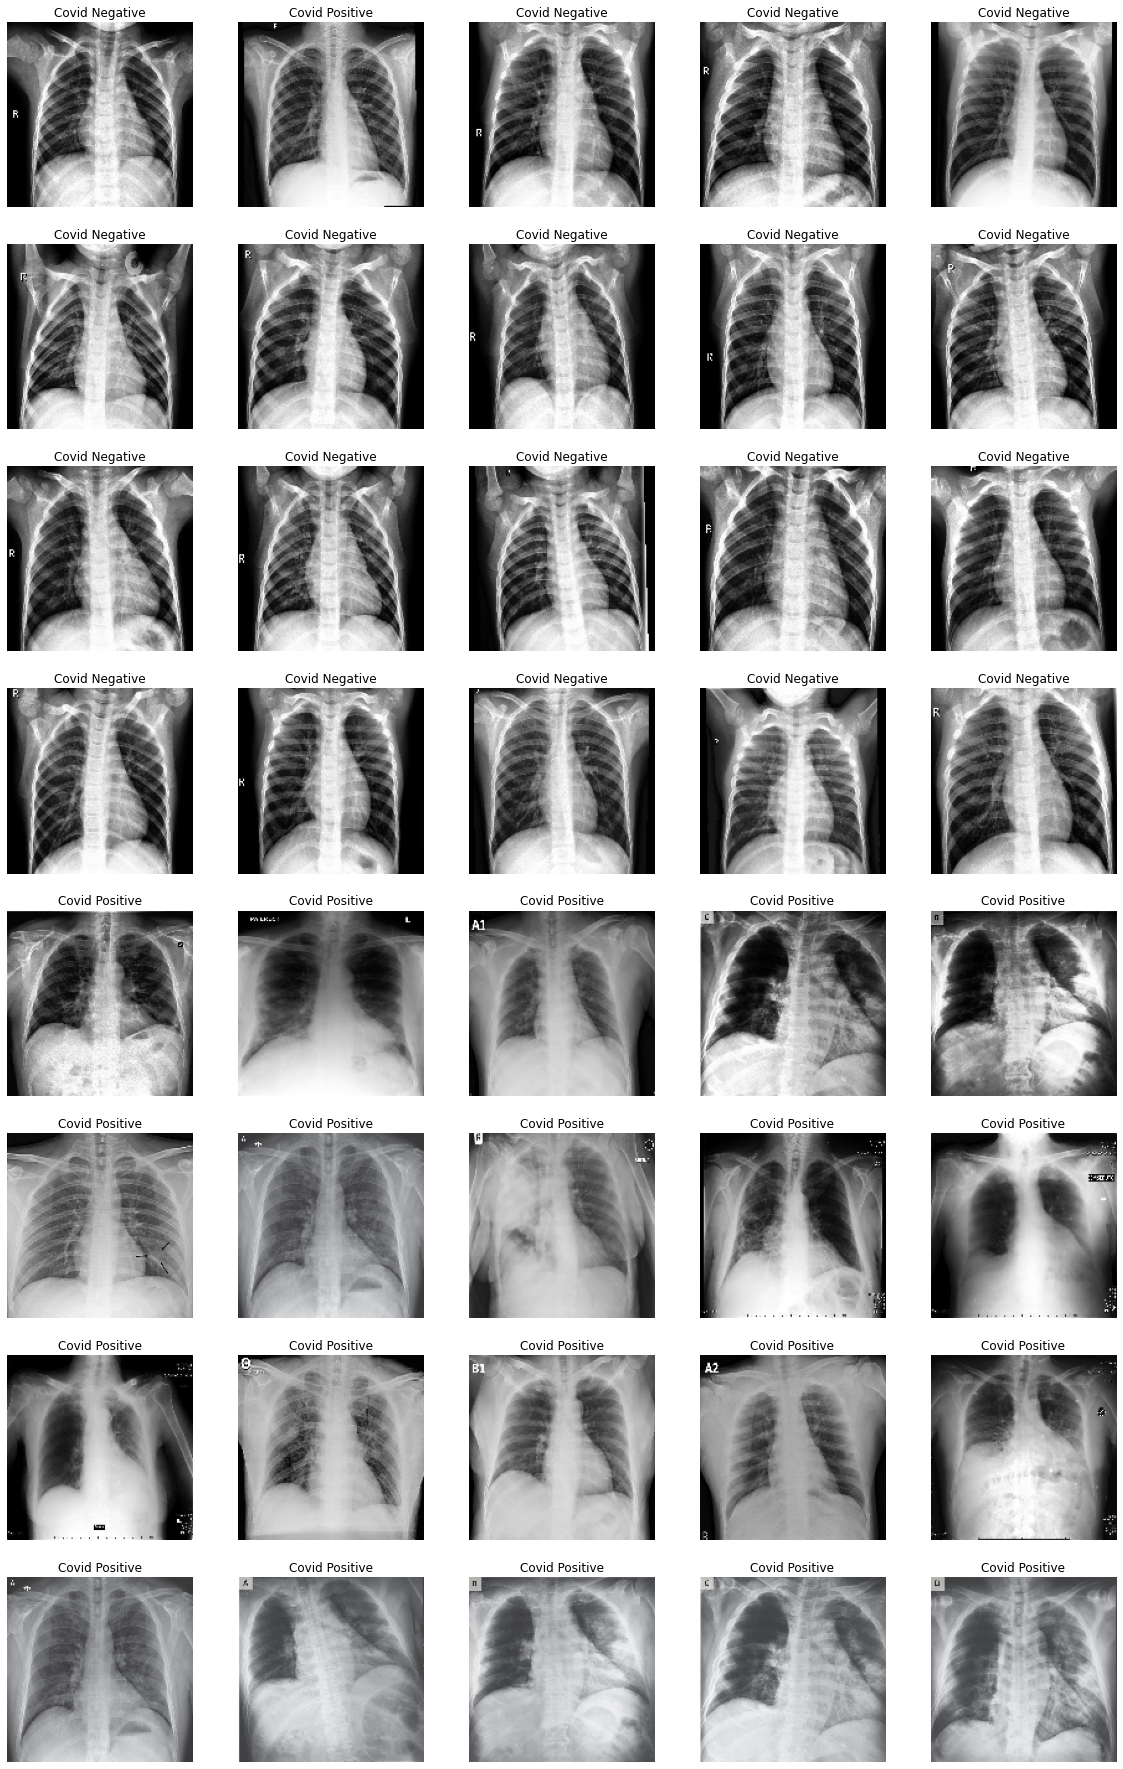

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration

nrows = 8
ncols = 5

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=12



for i, img_path in enumerate(test_generator.filepaths):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = tf.keras.preprocessing.image.load_img(
      img_path, target_size=(150, 150)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    # predictions = model.predict(img_array)
    predictions = model.predict(img_array) 
    sp.set_title(class_names[np.where(predictions>=0.5, 1, 0)[0][0]])
  
    plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
